In [1]:
from keras import models
import tensorflow as tf 
from keras import layers 
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation= 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation= 'relu'))
model.add(layers.Dense(10,activation= 'softmax'))

2021-11-08 17:49:12.448569: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-08 17:49:12.448605: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Sean-PC
2021-11-08 17:49:12.448613: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Sean-PC
2021-11-08 17:49:12.448719: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.63.1
2021-11-08 17:49:12.448742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.63.1
2021-11-08 17:49:12.448750: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.63.1
2021-11-08 17:49:12.449062: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in pe

In [3]:
(train_img,train_lbl),(test_img,test_lbl) = mnist.load_data()

In [4]:
train_img = train_img.reshape((60000,28,28,1))
train_img = train_img.astype('float32')/255

test_img = test_img.reshape((10000,28,28,1))
test_img = test_img.astype('float32')/255

train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

In [5]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics= ['accuracy'])
model.fit(train_img,train_lbl,epochs = 5,batch_size= 64)

2021-11-08 17:49:12.937534: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.1743 - accuracy: 0.9448
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0473 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0323 - accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0250 - accuracy: 0.9919
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0198 - accuracy: 0.9941


In [6]:
test_loss,test_acc = model.evaluate(test_img,test_lbl)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9917
0.9916999936103821


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

# Dogs Vs Cats 


In [9]:
org_dataset_dir = '/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Kaggle/dogs_cats'
base_dir = '/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Kaggle/dogs_cats_small'
#os.mkdir(base_dir)
train_dir = os.path.join(base_dir,'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
#os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
#os.mkdir(train_dogs_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
#os.mkdir(validation_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
#os.mkdir(validation_cats_dir)

test_cats_dir = os.path.join(test_dir,'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
#os.mkdir(test_dogs_dir)


In [53]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(org_dataset_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(org_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(org_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [54]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(org_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(org_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(org_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [55]:
print(len(os.listdir(train_cats_dir)))

1000


# Daddies Covnet 

In [56]:
model_cat = models.Sequential()
model_cat.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model_cat.add(layers.MaxPooling2D((2,2)))
model_cat.add(layers.Conv2D(64,(3,3),activation='relu'))
model_cat.add(layers.MaxPooling2D((2,2)))
model_cat.add(layers.Conv2D(128,(3,3),activation='relu'))
model_cat.add(layers.MaxPooling2D((2,2)))
model_cat.add(layers.Conv2D(128,(3,3),activation='relu'))
model_cat.add(layers.MaxPooling2D((2,2)))
model_cat.add(layers.Flatten())
model_cat.add(layers.Dense(512,activation= 'relu'))
model_cat.add(layers.Dense(1,activation='sigmoid'))

In [57]:
model_cat.compile(loss = 'binary_crossentropy',optimizer= optimizers.RMSprop(lr=1e-4),metrics = ['acc'])

In [58]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size = 20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size = 20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [59]:
history = model_cat.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
 73/100 [====================>.........] - ETA: 5s - loss: 0.6931 - acc: 0.5240

KeyboardInterrupt: 

In [ ]:
model.save('cats_and_dogs_small_1.h5')


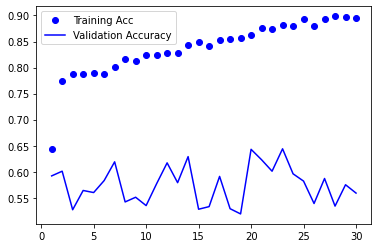

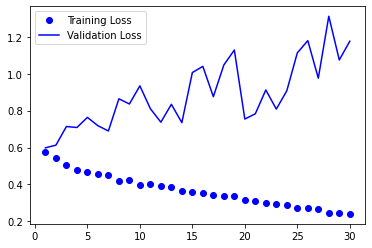

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label = 'Training Acc')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.legend()

In [ ]:
datagen = ImageDataGenerator(rotation_range= 40, width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

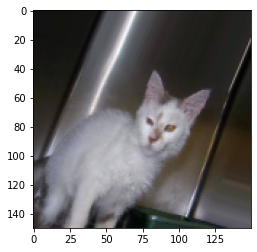

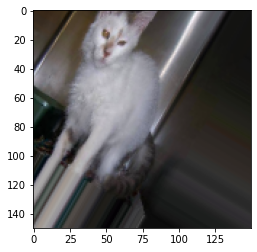

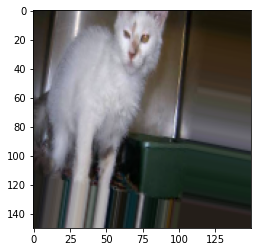

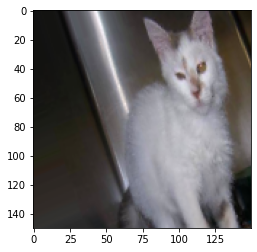

In [ ]:
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir) ]
img_path = fnames[3]

img =image.load_img(img_path,target_size=(150,150))

x =image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x,batch_size= 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 ==0:
        break

In [60]:
model_cat = models.Sequential()
model_cat.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model_cat.add(layers.MaxPooling2D((2,2)))
model_cat.add(layers.Conv2D(64,(3,3),activation='relu'))
model_cat.add(layers.MaxPooling2D((2,2)))
model_cat.add(layers.Conv2D(128,(3,3),activation='relu'))
model_cat.add(layers.MaxPooling2D((2,2)))
model_cat.add(layers.Conv2D(128,(3,3),activation='relu'))
model_cat.add(layers.MaxPooling2D((2,2)))
model_cat.add(layers.Flatten())
model_cat.add(layers.Dropout((0.5)))
model_cat.add(layers.Dense(512,activation= 'relu'))
model_cat.add(layers.Dense(1,activation='sigmoid'))

In [61]:
model_cat.compile(loss = 'binary_crossentropy',optimizer= optimizers.RMSprop(learning_rate=1e-4),metrics = ['acc'])

In [62]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range= 40, width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, fill_mode= 'nearest')

test_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size= 32,class_mode='binary')

validation_generator =  test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size= 32,class_mode='binary')

history = model_cat.fit(train_generator,steps_per_epoch= 2000//32,epochs= 100,validation_data= validation_generator,validation_steps= 1000//32, batch_size= 32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 24s 382ms/step - loss: 0.6976 - acc: 0.5366 - val_loss: 0.6939 - val_acc: 0.5000
Epoch 2/100
62/62 [==============================] - 24s 387ms/step - loss: 0.6912 - acc: 0.5335 - val_loss: 0.6841 - val_acc: 0.5958
Epoch 3/100
62/62 [==============================] - 17s 261ms/step - loss: 0.6880 - acc: 0.5325 - val_loss: 0.6817 - val_acc: 0.5595
Epoch 4/100
62/62 [==============================] - 20s 330ms/step - loss: 0.6816 - acc: 0.5600 - val_loss: 0.6717 - val_acc: 0.5514
Epoch 5/100
62/62 [==============================] - 24s 386ms/step - loss: 0.6719 - acc: 0.5874 - val_loss: 0.6887 - val_acc: 0.5454
Epoch 6/100
62/62 [==============================] - 25s 400ms/step - loss: 0.6672 - acc: 0.6032 - val_loss: 0.6535 - val_acc: 0.5988
Epoch 7/100
62/62 [==============================] - 24s 378ms/step - loss: 0.6541 - acc: 0.6072 - val_loss: 0.6

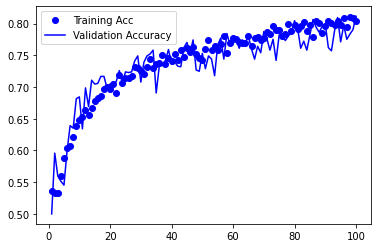

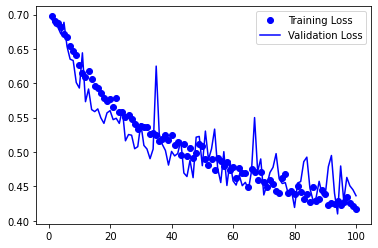

In [64]:
model_cat.save('cats_and_dogs_small_2.h5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label = 'Training Acc')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.legend()